<h1  align="center">Properatti</h1>
<h2  align="center">Machine Learning</h2>

In [121]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.patches
import warnings

warnings.filterwarnings('ignore')


df_caba = pd.read_csv('df_caba.csv', index_col = 'index')

In [18]:
df_caba.head(3)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,image_thumbnail,ambientes,parrilla
index,,,,,,,,,,,,,,,,,,,,,
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,2.0,0
1,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,2.0,0
2,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,3.0,0


In [122]:
df_caba = df_caba.loc[df_caba['place_name'] != 'Capital Federal']
df_caba.reset_index(drop=True, inplace=True)

In [40]:
df_caba.shape

(29560, 23)

In [41]:
df_caba.head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,image_thumbnail,ambientes,parrilla
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,2.0,0
1,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,2.0,0
2,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,3.0,0
3,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,...,40.0,3066.666667,3450.000000,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,1.0,0
4,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,...,60.0,3000.000000,3250.000000,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,2.0,0


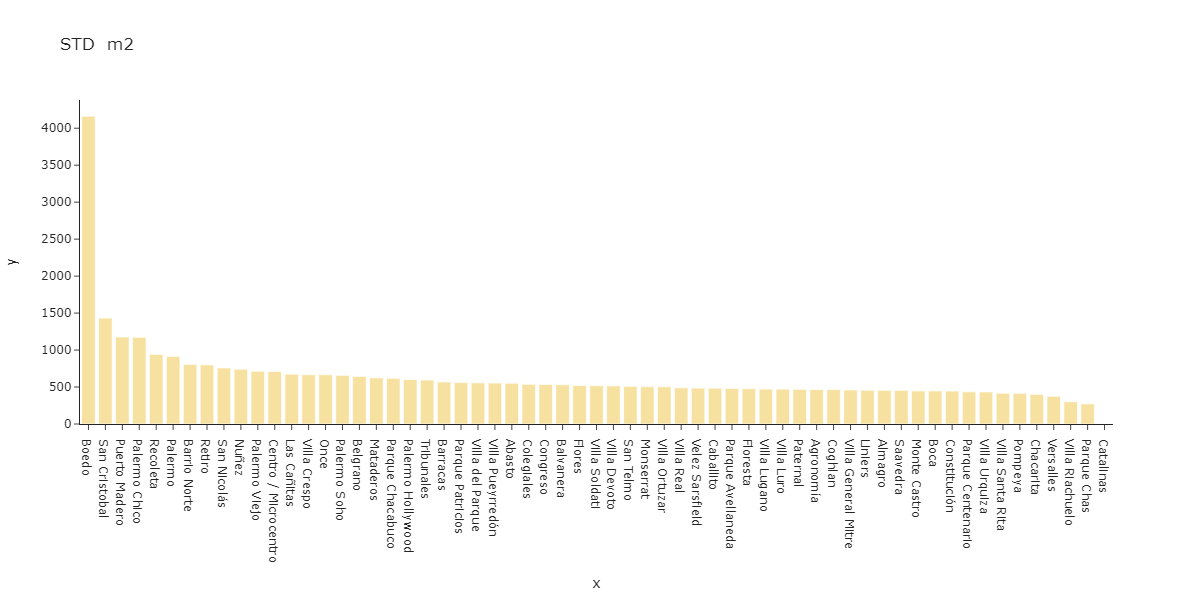

In [192]:
def getPlotGroup(data, number_color):
    x = data.groupby('place_name')['price_usd_per_m2'].std().sort_values(ascending = False).index
    y = data.groupby('place_name')['price_usd_per_m2'].std().sort_values(ascending = False).values
   
    df = pd.DataFrame({'x': x, 'y': y})
    fig = px.bar(df, x=x, y=y,
                title= 'STD ' + ' m2 ',
                color_discrete_sequence=[px.colors.qualitative.Alphabet[number_color]],
                width=800, height=600,
                template="simple_white"
                )
    return fig.show()
    
'''
Funcion:
'''
    
getPlotGroup(df_caba,  7)

In [42]:
df_caba.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms',
       'properati_url', 'description', 'title', 'image_thumbnail', 'ambientes',
       'parrilla'],
      dtype='object')

<h3> Limpieza de Datos </h3>

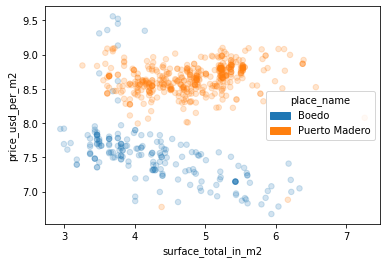

(879, 6)


In [183]:
import numpy as np

df_caba_filter = df_caba_model.loc[df_caba_model['place_name'].isin(['Boedo', 'Puerto Madero'])]
levels, categories = pd.factorize(df_caba_filter['place_name'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(np.log(df_caba_filter['surface_total_in_m2']),np.log(df_caba_filter['price_usd_per_m2']), s=30,
            alpha=0.2, c=colors)
plt.xlabel('surface_total_in_m2')
plt.ylabel('price_usd_per_m2')
plt.legend(handles=handles, title='place_name')
plt.show()
print(df_caba_filter.shape)

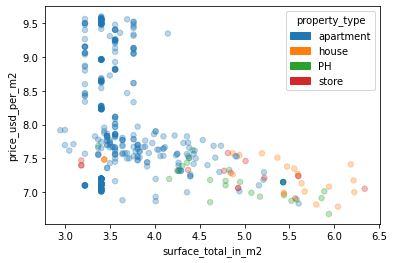

(590, 23)


In [187]:
df_caba_filter = df_caba.loc[df_caba['place_name'].isin(['Boedo'])]
levels, categories = pd.factorize(df_caba_filter['property_type'])
colors = [plt.cm.tab10(i) for i in levels] 
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(np.log(df_caba_filter['surface_total_in_m2']),np.log(df_caba_filter['price_usd_per_m2']), s=30,
            alpha=0.3, c=colors)
plt.xlabel('surface_total_in_m2')
plt.ylabel('price_usd_per_m2')
plt.legend(handles=handles, title='property_type')
plt.show()
print(df_caba_filter.shape)

In [124]:
df_caba_model = df_caba[['price_usd_per_m2','property_type','place_name', 'price', 'price_aprox_usd', 'surface_total_in_m2', 'rooms', 'ambientes', 'parrilla']]
df_caba_model.head(20)

,price_usd_per_m2,property_type,place_name,price,price_aprox_usd,surface_total_in_m2,rooms,ambientes,parrilla
0,1127.272727,PH,Mataderos,62000.0,62000.0,55.0,NaN,2.0,0
1,1309.090909,apartment,Mataderos,72000.0,72000.0,55.0,NaN,2.0,0
2,NaN,PH,Liniers,95000.0,95000.0,NaN,NaN,3.0,0
3,3066.666667,apartment,Belgrano,138000.0,138000.0,45.0,NaN,1.0,0
4,3000.000000,apartment,Belgrano,195000.0,195000.0,65.0,NaN,2.0,0
5,2234.000000,apartment,Palermo Soho,111700.0,111700.0,50.0,1.0,3.0,0
6,3521.428571,apartment,Palermo Soho,147900.0,147900.0,42.0,1.0,1.0,0
7,1707.142857,PH,Mataderos,239000.0,239000.0,140.0,4.0,4.0,1
8,3365.384615,apartment,Palermo,350000.0,350000.0,104.0,3.0,NaN,0
9,2292.372881,apartment,Palermo,270500.0,270500.0,118.0,4.0,4.0,0


In [125]:
df_caba_model['ambientes'] = df_caba_model.apply(lambda x: x['ambientes'] if x['ambientes'] > 0 else x['rooms'], axis = 1)

In [126]:
df_caba_model.drop(columns=['rooms','price_aprox_usd','price'], inplace = True)

In [127]:
round(df_caba_model.isnull().sum() / df_caba_model.shape[0],2).sort_values(ascending = False)

price_usd_per_m2       0.28
ambientes              0.19
surface_total_in_m2    0.19
parrilla               0.00
place_name             0.00
property_type          0.00
dtype: float64

In [128]:
print('Luego de los drop queda un ',(df_caba_model.dropna().shape[0] / df_caba_model.shape[0]) * 100, '% del Data Set original')

Luego de los drop queda un  58.39648173207036 % del Data Set original


In [179]:
df_caba_model.loc[df_caba['place_name'].isin(['Boedo'])].surface_total_in_m2.value_counts()

40.0     43
38.0     18
43.0     15
39.0     13
36.0     10
         ..
66.0      1
160.0     1
148.0     1
380.0     1
527.0     1
Name: surface_total_in_m2, Length: 150, dtype: int64

In [180]:
index_drop = df_caba_model.loc[(df_caba['place_name'].isin(['Boedo'])) & (df_caba['surface_total_in_m2'].isin([30.0,35.0,25.0,40.0]))].index

In [181]:
df_caba_model.drop(index_drop, inplace=True)

In [182]:
df_caba_model.reset_index(drop=True, inplace=True)